**Cleaning Methods: Lab Activity**

In [3]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('data/mortgage_applicants.csv')
df1

,Unnamed: 0,ID,Income,Term,Balance,Debt,Score,Default
0,0,567,17626,10 Years,1381,293,228.0,False
1,1,523,18959,20 Years,883,1012,187.0,False
2,2,544,20560,10 Years,684,898,86.0,False
3,3,370,21894,10 Years,748,85,NaN,False
4,4,756,24430,10 Years,1224,59,504.0,False
...,...,...,...,...,...,...,...,...
851,851,71,30191,20 Years,1319,3880,55.0,True
852,852,932,41669,20 Years,1385,32,780.0,False
853,853,39,36816,20 Years,1868,3123,366.0,True
854,854,283,42145,20 Years,1447,2498,422.0,False


In [7]:
missingValuesEachColumn = df1.isna().sum()
print(missingValuesEachColumn)

Unnamed: 0     0
ID             0
Income         0
Term           0
Balance        0
Debt           0
Score         20
Default        0
dtype: int64


*what might have caused these values to be missing? *


In [10]:
df1Cleaned = df1.dropna()
print(df1Cleaned)
print(df1Cleaned.isna().sum())

     Unnamed: 0   ID  Income      Term  Balance  Debt  Score  Default
0             0  567   17626  10 Years     1381   293  228.0    False
1             1  523   18959  20 Years      883  1012  187.0    False
2             2  544   20560  10 Years      684   898   86.0    False
4             4  756   24430  10 Years     1224    59  504.0    False
5             5  929   22995  20 Years     1678  1329  384.0    False
..          ...  ...     ...       ...      ...   ...    ...      ...
851         851   71   30191  20 Years     1319  3880   55.0     True
852         852  932   41669  20 Years     1385    32  780.0    False
853         853   39   36816  20 Years     1868  3123  366.0     True
854         854  283   42145  20 Years     1447  2498  422.0    False
855         855  847   30594  20 Years     1216  2473  179.0     True

[836 rows x 8 columns]
Unnamed: 0    0
ID            0
Income        0
Term          0
Balance       0
Debt          0
Score         0
Default       0
dtype: i

*What does this code do*
removes rows with Nan values. 

In [22]:
df1_missing = df1[df1['Score'].isna()]
print(df1_missing)

     Unnamed: 0   ID  Income      Term  Balance  Debt  Score  Default
3             3  370   21894  10 Years      748    85    NaN    False
20           20  673   24185  10 Years      771    77    NaN    False
36           36   36   18247  10 Years     1162   431    NaN     True
61           61  643   20320  10 Years      643   461    NaN    False
86           86   83   19355  10 Years      473    42    NaN    False
162         162  839   20756  10 Years     1148     4    NaN    False
221         221  477   21181  10 Years     1133  1878    NaN     True
338         338  539   22586  20 Years     1088   826    NaN    False
357         357  714   19150  10 Years     1214    38    NaN    False
361         361  364   20062  10 Years      979   161    NaN    False
383         383  224   21007  10 Years      535   426    NaN    False
388         388  429   17443  10 Years     1214    51    NaN    False
483         483  218   23480  20 Years     1374   101    NaN    False
535         535  748

In [18]:
df1['Income'].mean()

29917.070093457944

In [20]:
df1Cleaned['Income'].mean()

29945.385167464116

In [23]:
df1_missing['Income'].mean()

28733.5

**Visualisation methods for Data Analysis**

In [25]:
import matplotlib.pyplot as plt

In [27]:
df_accounts = pd.read_csv('data/accounts.csv')
df_locations = pd.read_csv('data/locations.csv')

In [28]:
df_accounts

,Unnamed: 0,ID,has_business_account
0,0,567,False
1,1,523,False
2,2,544,False
3,3,370,False
4,4,756,True
...,...,...,...
851,851,71,False
852,852,932,False
853,853,39,True
854,854,283,False


In [29]:
df_locations

,Unnamed: 0,ID,nation
0,0,567,England
1,1,523,Scotland
2,2,544,Scotland
3,3,370,England
4,4,756,Scotland
...,...,...,...
851,851,71,England
852,852,932,England
853,853,39,Scotland
854,854,283,England


In [31]:
df_accounts.isna().sum()

Unnamed: 0              0
ID                      0
has_business_account    0
dtype: int64

In [32]:
df_locations.isna().sum()

Unnamed: 0    0
ID            0
nation        0
dtype: int64

<Axes: xlabel='has_business_account', ylabel='count'>

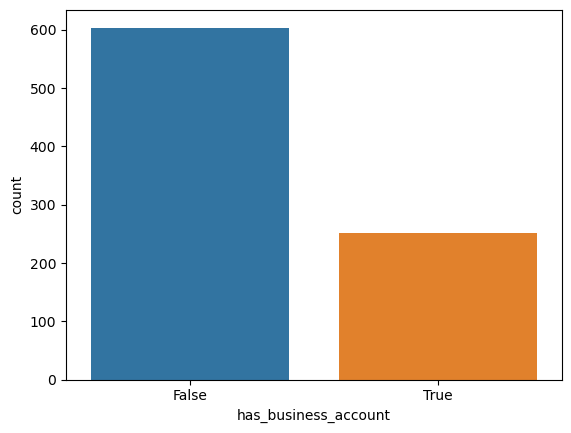

In [39]:
import seaborn as sns
fix, ax = plt.subplots()

sns.countplot(data=df_accounts, x ='has_business_account', ax=ax)

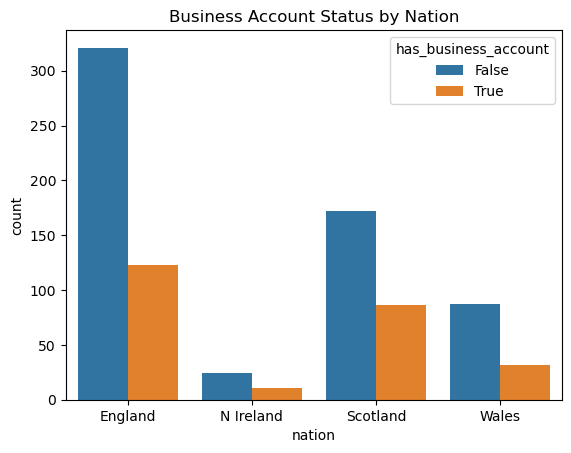

In [47]:
merged_df = pd.merge(df_accounts, df_locations, on='ID')

combined_df = merged_df[['ID', 'has_business_account', 'nation']]

frequency_df = combined_df.groupby(['has_business_account', 'nation']).size().reset_index(name='count')

sns.barplot(x='nation', y='count', hue='has_business_account', data=frequency_df)

plt.title('Business Account Status by Nation')

plt.show()